In [1]:
import torch
import random
import sys
from diffusers import StableDiffusionPipeline
from torch.cuda.amp import autocast
from re import sub
import time
from IPython.display import Image
from IPython.display import display

In [2]:
# Get access token from a file nammed `.HF_ACCESS_TOKEN`
file = open('.HF_ACCESS_TOKEN', 'r')
ACCESS_TOKEN = file.readlines()[0]
    
def text_2_img(prompt, output_folder="./output", num_images=4):
    def dummy(images, **kwargs):
        return images, False

    def snake_case(s):
      return '_'.join(
        sub('([A-Z][a-z]+)', r' \1',
        sub('([A-Z]+)', r' \1',
        s.replace('-', ' '))).split()).lower()

    # With 10GB of VRAM on a 3080 – in order to fit the model in memory 
    # we create the pipeline using float16, rather than the default of float32.
    pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                                    revision="fp16",
                                                    torch_dtype=torch.float16,
                                                    use_auth_token=ACCESS_TOKEN)
    pipe.to("cuda")                 # Run on GPU
    pipe.safety_checker = dummy     # Disable NSFW check


    snake_prompt = snake_case(prompt)[:20]
    timestamp = int(time.time())
    generated_files = []
    for i in range(num_images):
        with autocast():
            image = pipe(prompt, guidance_scale=7.5)["sample"][0]
            save_file_name = f'{output_folder}/{i}_{timestamp}_{snake_prompt}.jpeg'
            image.save(save_file_name)
            generated_files.append(save_file_name)
    
    return generated_files

In [3]:
def display_images(images):
    display(*[Image(filename=f) for f in images])

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

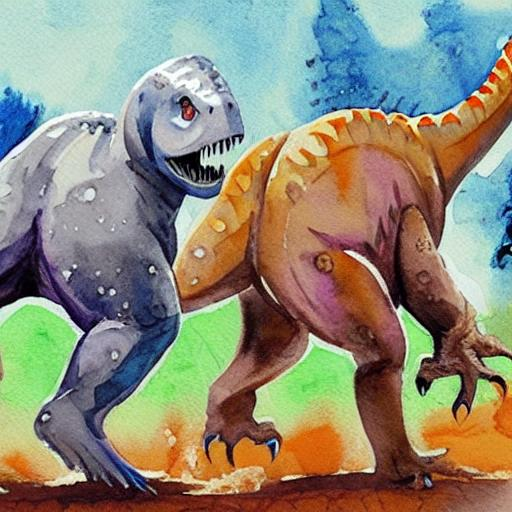

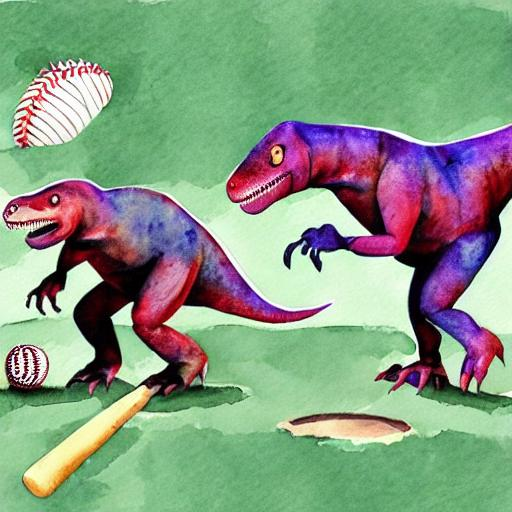

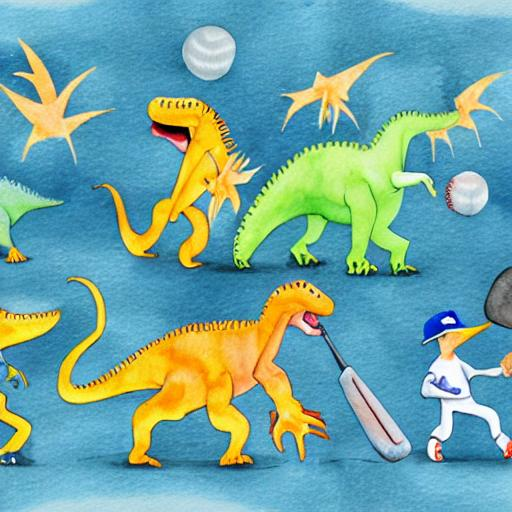

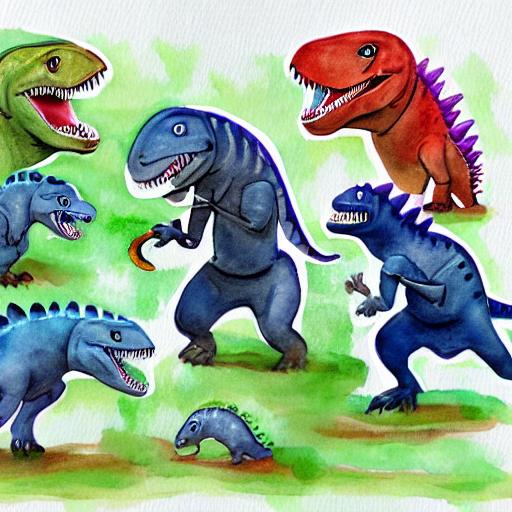

In [4]:
PROMPT = "dinosaurs playing baseball in watercolor style"
display_images(
    text_2_img(PROMPT)
)